In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import time
sys.path.insert(1, 'C://Users//kid//SynologyDrive//Lab2023//KIDs//QTLab2324//IRdetection//Instruments//Gas_Handler22')
sys.path.insert(2, 'C://Users//kid//SynologyDrive//Lab2023//KIDs//QTLab2324//IRdetection//Instruments//VNA_GUI')

In [2]:
import handler as h
import HP8753E as hp

In [3]:
vna = hp.HP8753E()
frigo = h.FridgeHandler()

Creating the object
VNA object created correctly!

Default number of points for a sweep: 1601
Creating the object


VisaIOError: VI_ERROR_RSRC_BUSY (-1073807246): The resource is valid, but VISA cannot currently access it.

In [ ]:
##Temp = 50

In [ ]:
#frigo.set_mixc_temp(Temp)

In [7]:
vna.set_params(pw = -40, bw = 500, pt = 1601, center = 5.347e9, span = 2e7)
vna.autoscale()
vna.set_save_path("C:\\Users\\kid\\SynologyDrive\\Lab2023\\KIDs\\QTLab2324\\IRdetection\\Instruments\\Test_data\\Power-sweep\\")

Remaining: 28...
Remaining: 27...
Remaining: 26...
Remaining: 25...
Remaining: 24...
Remaining: 23...
Remaining: 22...
Remaining: 21...
Remaining: 20...
Remaining: 19...
Remaining: 18...
Remaining: 17...
Remaining: 16...
Remaining: 15...
Remaining: 14...
Remaining: 13...
Remaining: 12...
Remaining: 11...
Remaining: 10...
Remaining: 9...
Remaining: 8...


C://Users//kid//SynologyDrive//Lab2023//KIDs//QTLab2324//IRdetection//Instruments//VNA_GUI\HP8753E.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10,8))


Remaining: 7...
Remaining: 6...
Remaining: 5...
Remaining: 4...
Remaining: 3...
Remaining: 2...
Remaining: 1...


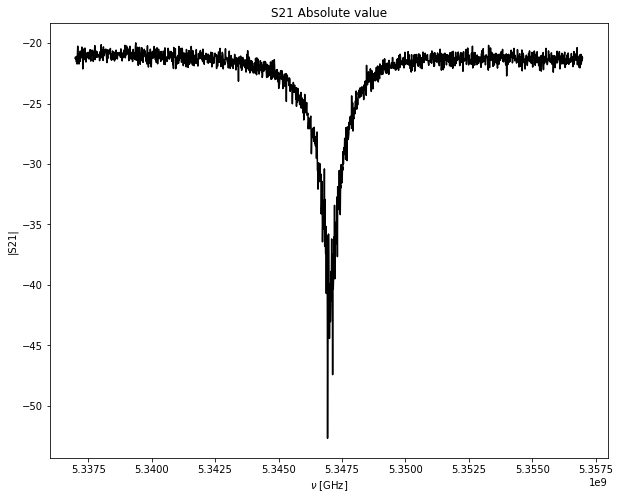

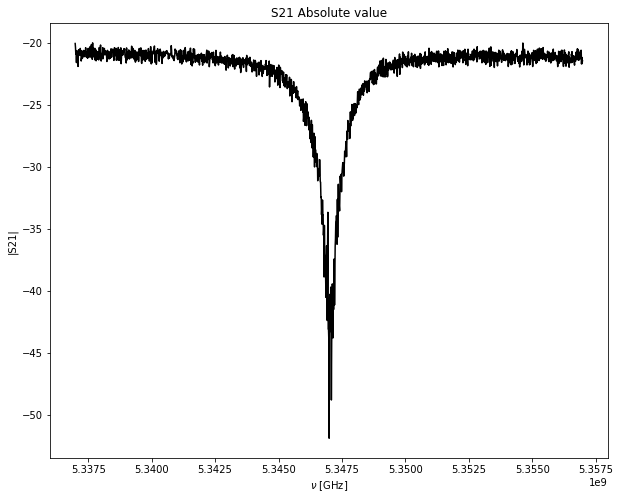

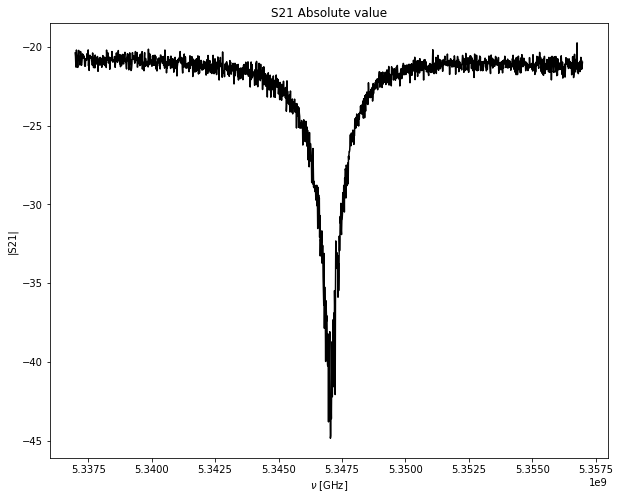

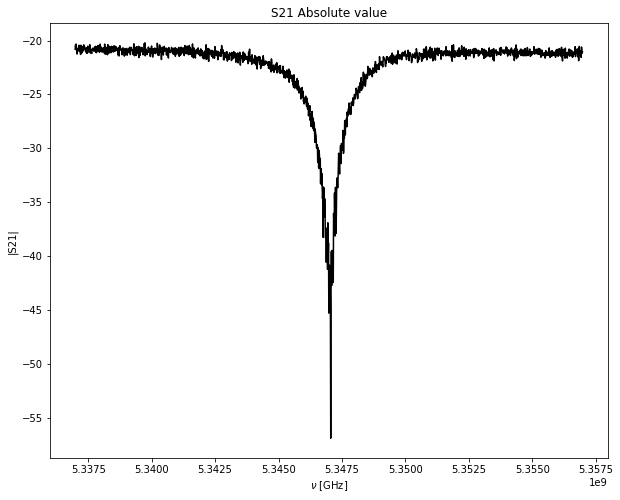

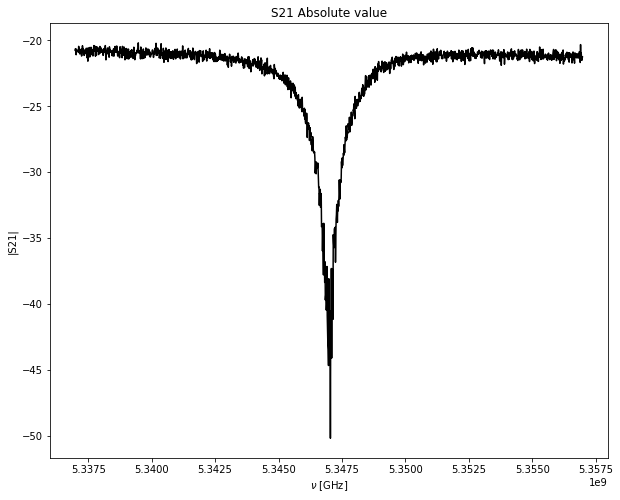

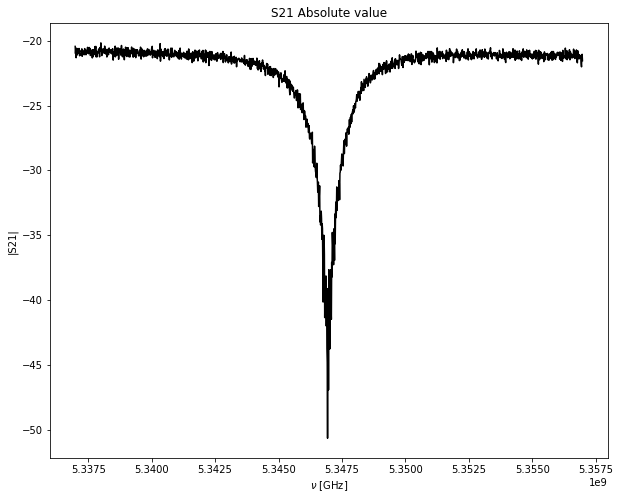

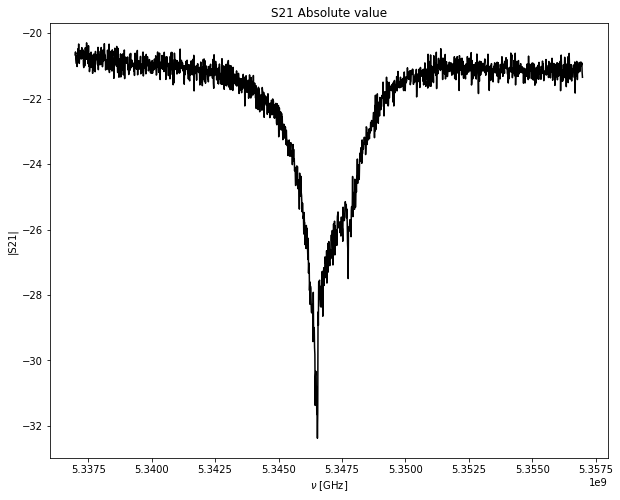

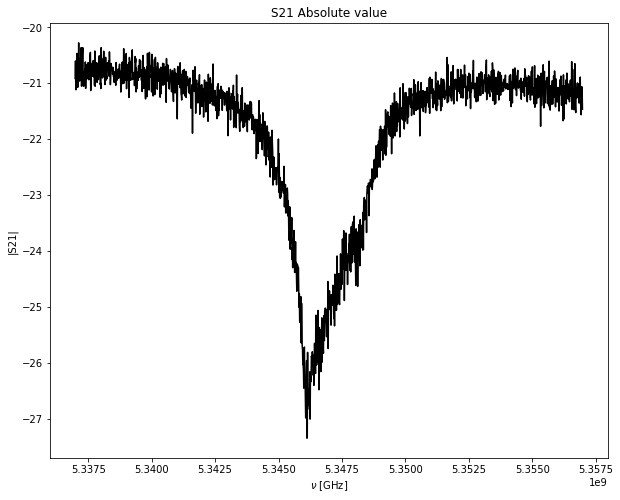

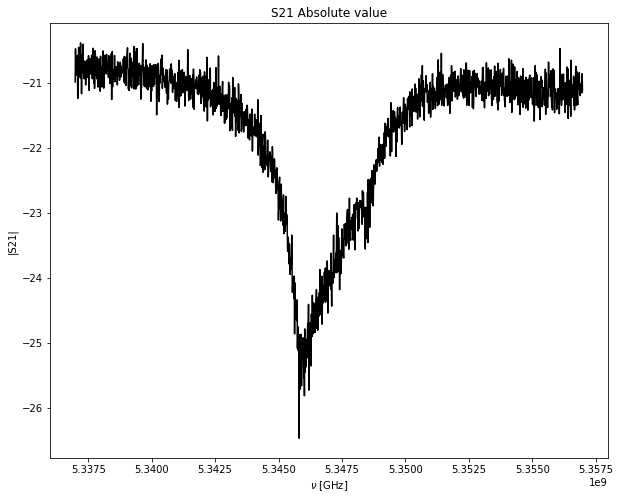

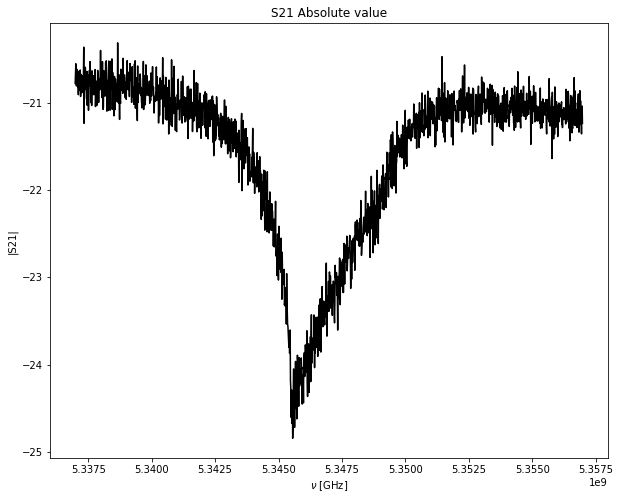

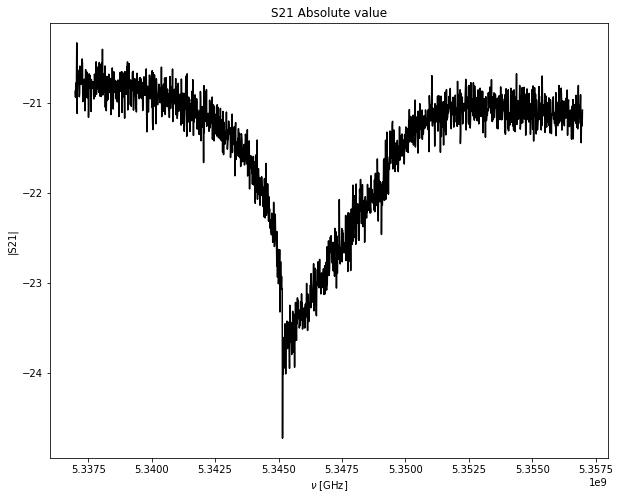

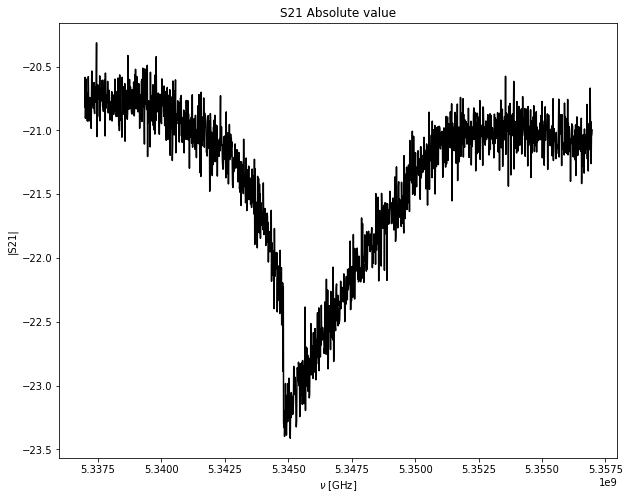

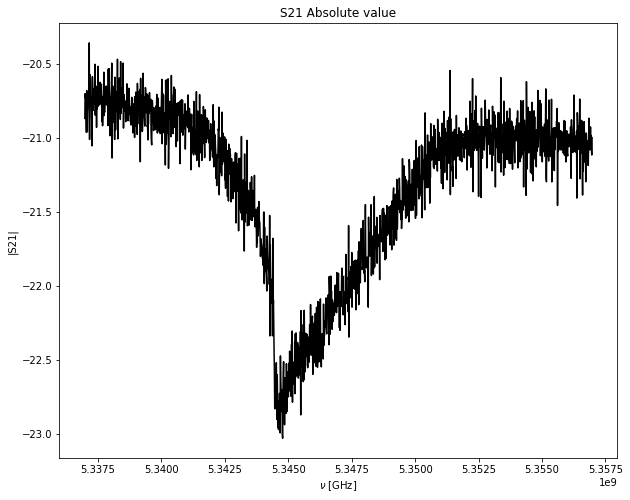

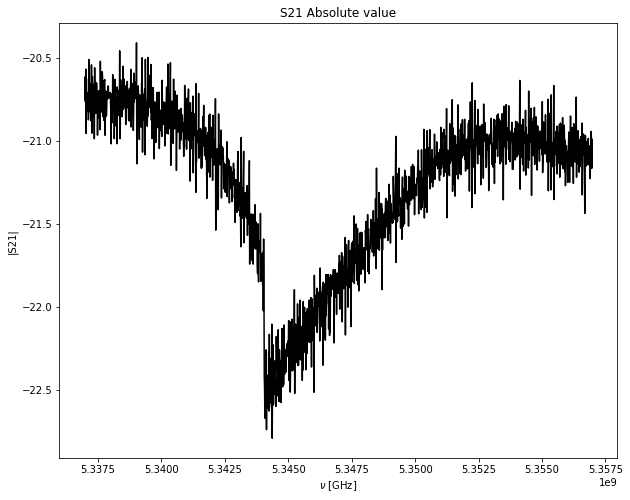

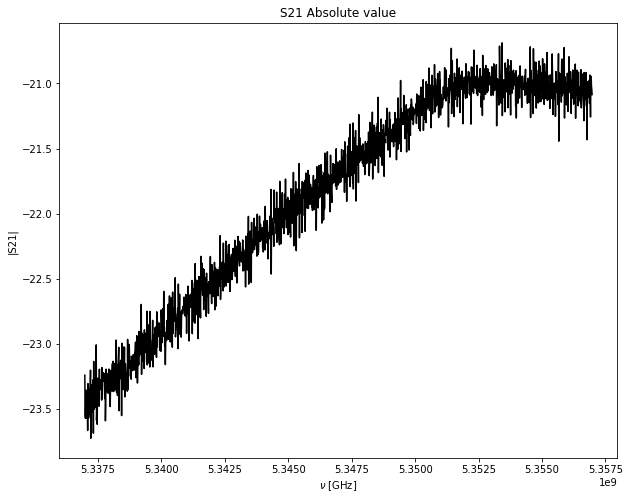

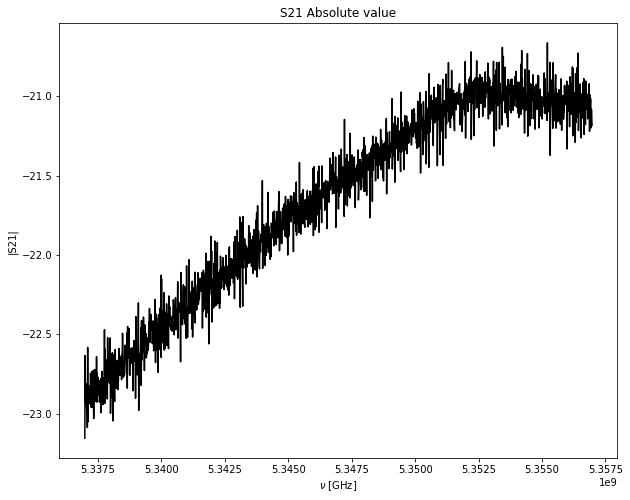

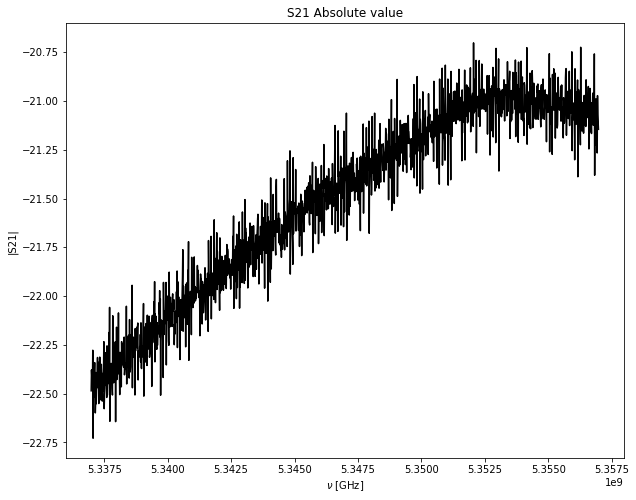

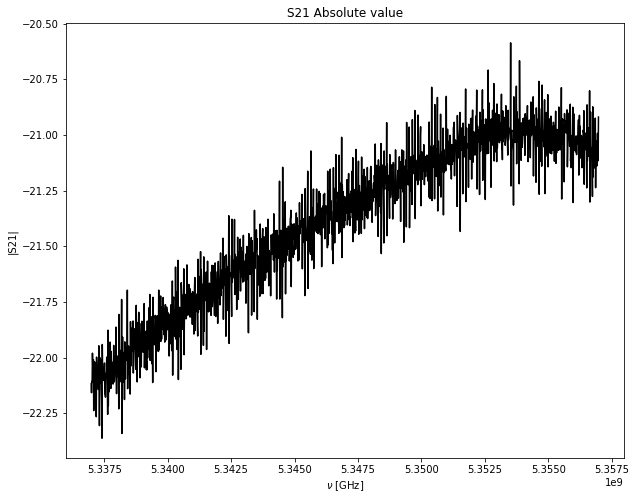

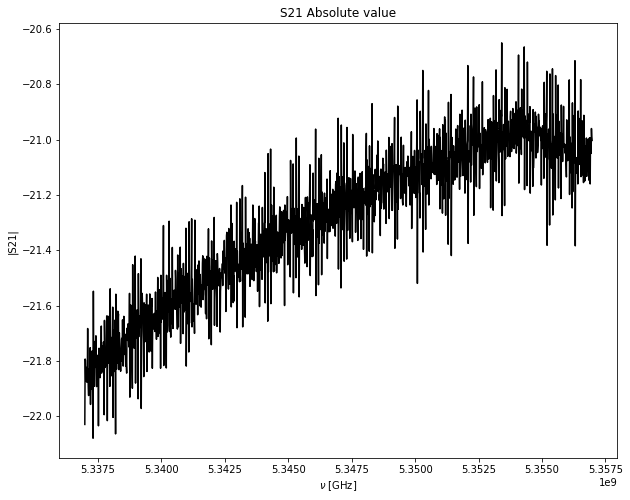

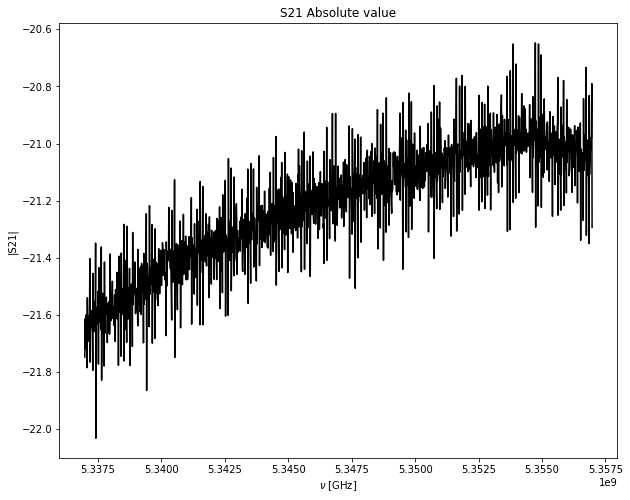

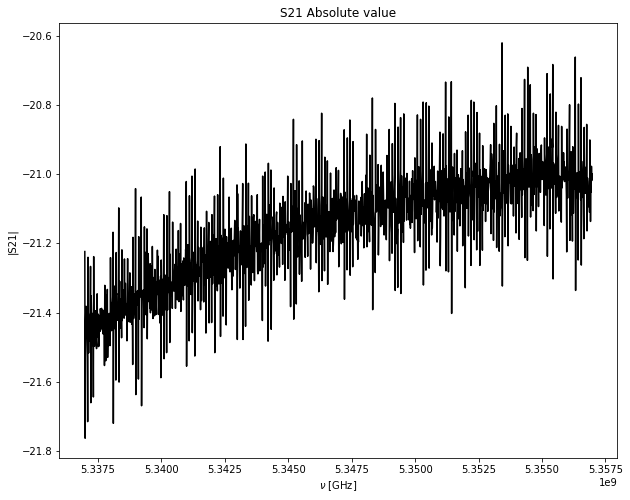

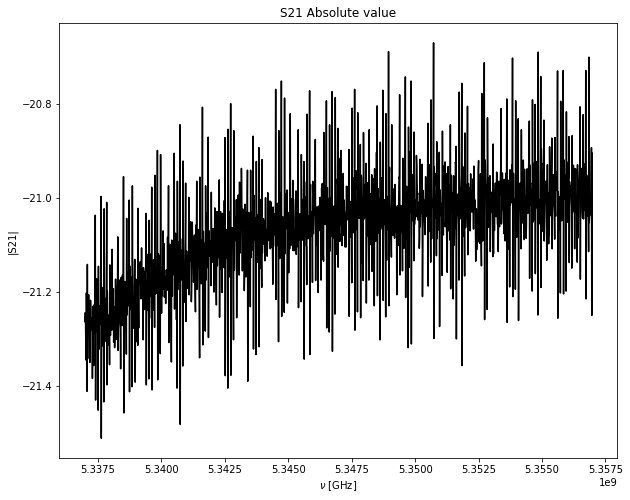

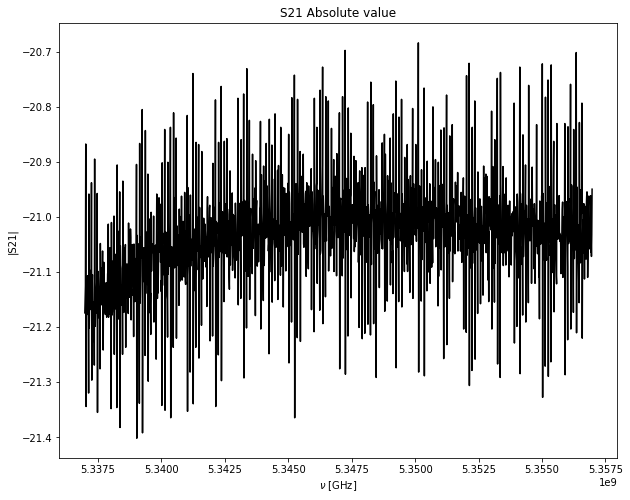

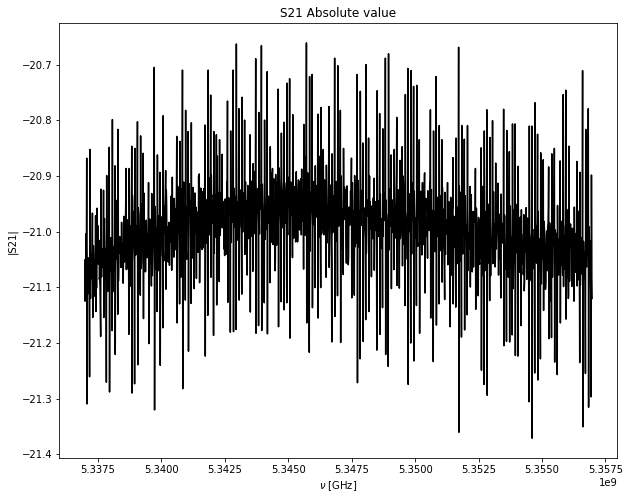

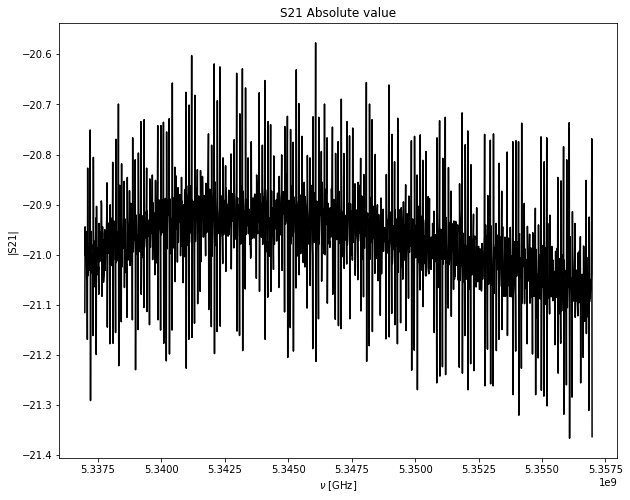

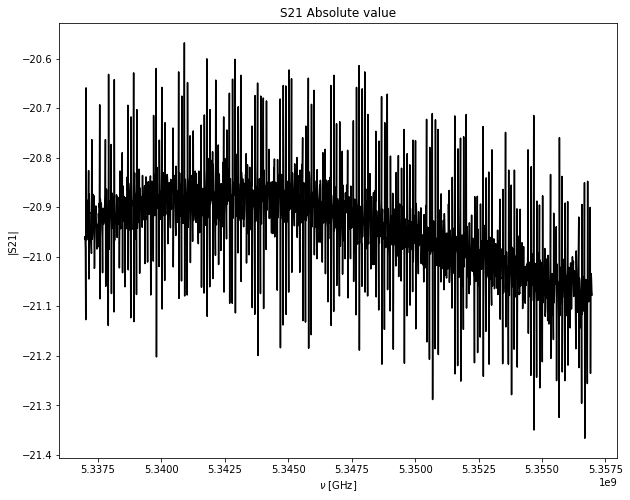

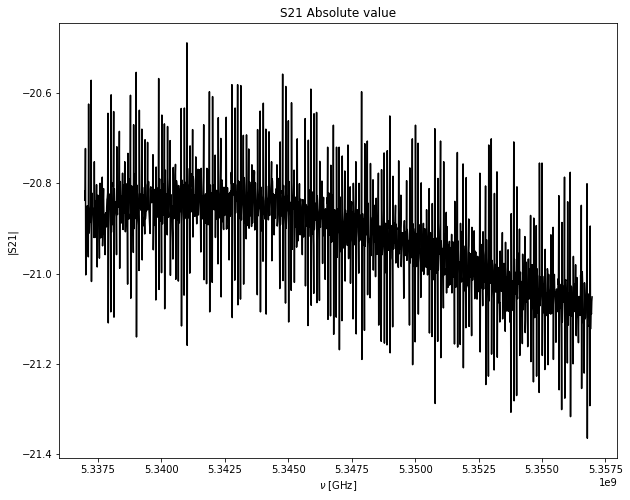

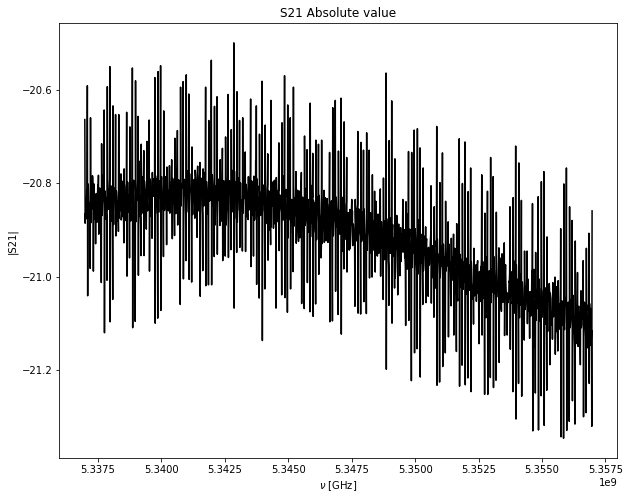

In [14]:
pows = np.arange(-40,-12,1)
data = []
num = 1
s21, f = vna.get_S21F()
for (j,pow) in enumerate(pows):
    print('Remaining: '+str(len(pows)-j)+'...')
    vna.set_power(pow)
    vna.autoscale()
    s21 = vna.get_S21F()[0]
    data.append(s21)
    vna.create_run_s21(j+1, s21, f)

In [15]:
f=f/1e9

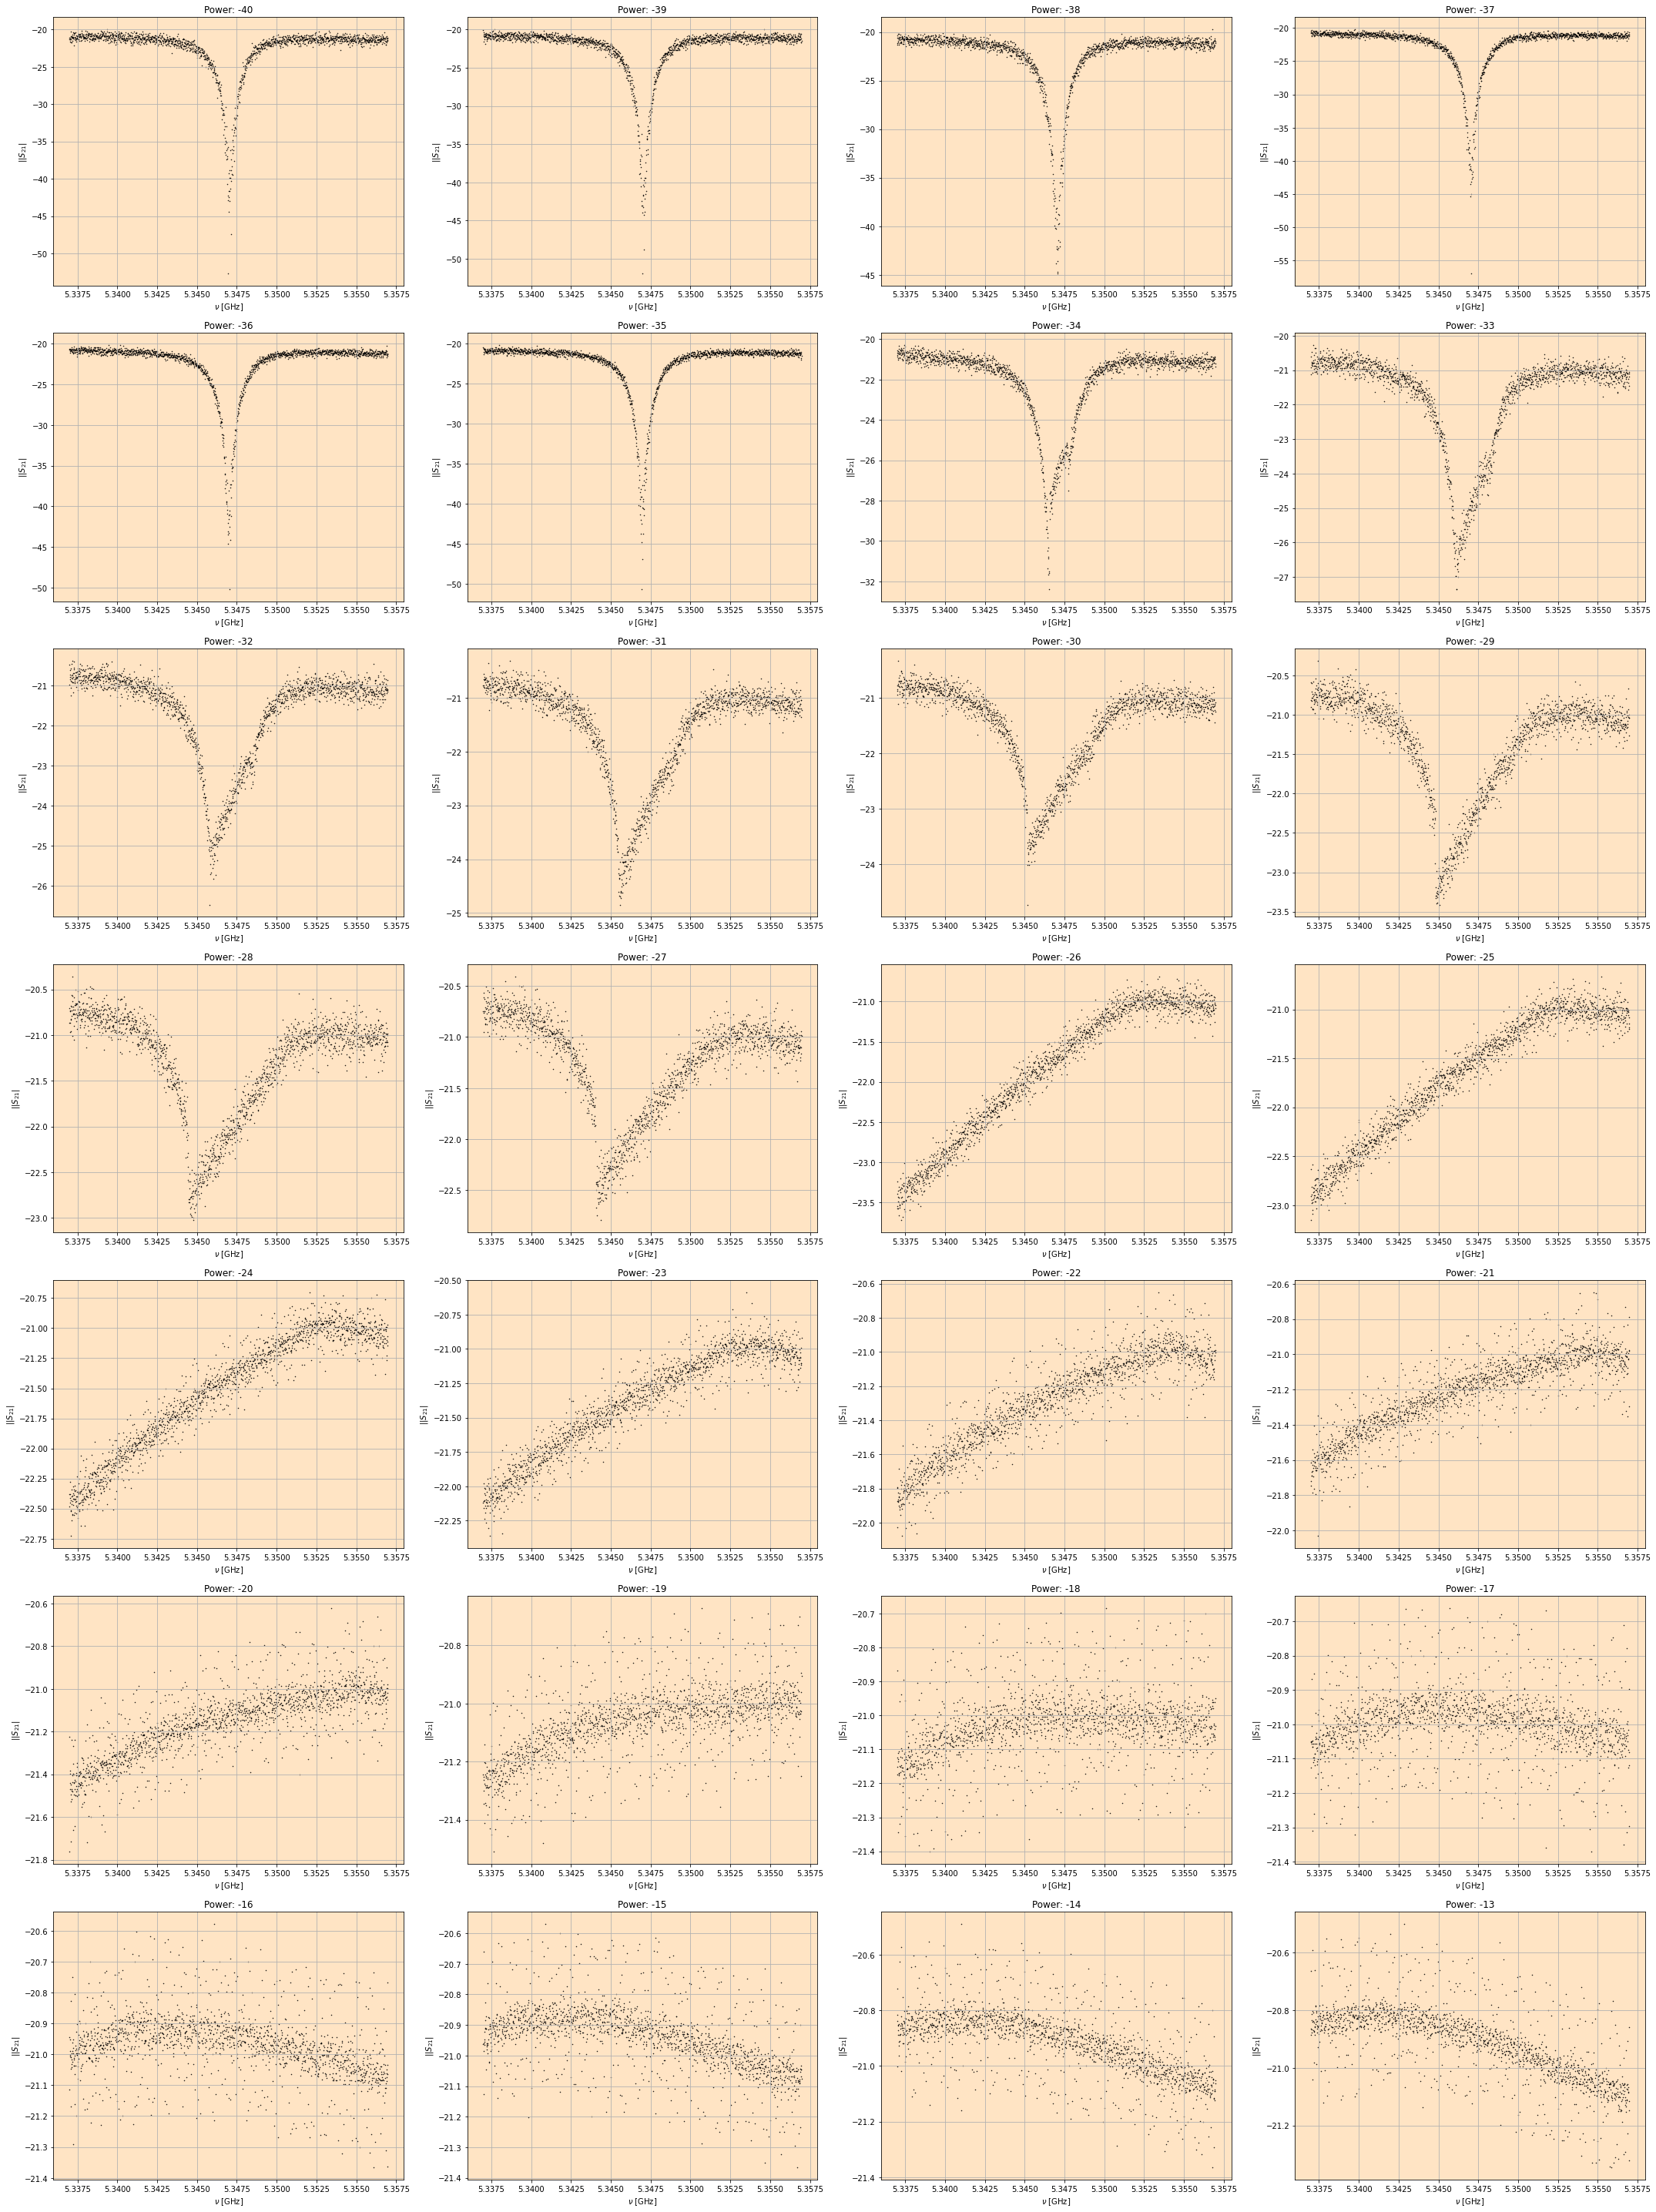

In [16]:
rows = 7
columns = int(len(pows)/rows)

fig, ax = plt.subplots(rows, columns, figsize=(30,40))

for row in range(rows):
    for col in range(columns):
        ax[row][col].scatter(f, data[row*columns+col], marker='.', s=1, color='black')
        ax[row][col].set_title('Power: '+str(pows[row*columns+col]))
        ax[row][col].grid()
        ax[row][col].set_facecolor('bisque')
        ax[row][col].set_xlabel(r'$\nu$ [GHz]')
        ax[row][col].set_ylabel(r'$||S_{21}|$')
fig.tight_layout()

In [17]:
import os
parent_dir = "C:\\Users\\kid\\SynologyDrive\\Lab2023\\KIDs\\QTLab2324\\IRdetection\\Instruments\\Test_data\\Power-sweep\\"

temps = np.arange(50,400,10)
pows = np.arange(-40,-12,1)
data = []
num = 1
s21, f = vna.get_S21F()

for t in temps:
    frigo.set_mixc_temp(t)
    time.sleep(1200)
    directory = 'T_'+str(t)
    path = os.path.join(parent_dir, directory) 
    os.mkdir(path) 
    vna.set_T(t)
    for (j,pow) in enumerate(pows):
        print('T = '+str(t)+'...Remaining: '+str(len(pows)-j)+'...')
        vna.set_power(pow)
        vna.autoscale()
        s21 = vna.get_S21F()[0]
        data.append(s21)
        vna.create_run_s21(j+1, s21, f)

Directory 'GeeksForGeeks' created


In [23]:
frigo.set_mixc_temp(30)

AttributeError: 'NoneType' object has no attribute 'write'